In [111]:
# Importing libraries, seaborn is new, I'm exploring. Had to install seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
# This imports the dataset as a dataframe.
digimon = pd.read_csv("DigiDB_digimonlist.csv")
digimon

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,245,Valkyrimon,Mega,Free,Wind,18,3,1330,139,148,129,129,168
245,246,ShineGreymon BM,Mega,Vaccine,Fire,22,2,1980,114,228,104,84,168
246,247,MirageGaogamon BM,Mega,Data,Light,20,2,1440,124,178,104,158,174
247,248,Ravemon BM,Mega,Vaccine,Wind,20,2,1040,133,149,139,144,213


In [13]:
# Checking for dublicates.
print(digimon.duplicated().sum())

0


In [16]:
# I believe that looking at the basic statistics could be interesting, so this does that.
digimon.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,125.000000,11.987952,1.574297,1210.883534,109.779116,124.518072,116.377510,112.638554,120.401606
std,72.024301,6.616501,0.854012,326.102384,32.454115,45.639372,32.132696,41.562888,32.633339
min,1.000000,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,63.000000,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,125.000000,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,187.000000,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,249.000000,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [20]:
# This prints out the counts of the possible values in the categorical columns.
stage = digimon["Stage"].value_counts()
types = digimon["Type"].value_counts()
attribute = digimon["Attribute"].value_counts()
print(stage)
print()
print(types)
print()
print(attribute)

Stage
Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: count, dtype: int64

Type
Virus      82
Vaccine    70
Data       60
Free       37
Name: count, dtype: int64

Attribute
Dark        37
Fire        33
Light       29
Neutral     28
Plant       25
Electric    25
Earth       24
Water       24
Wind        24
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Attribute'>

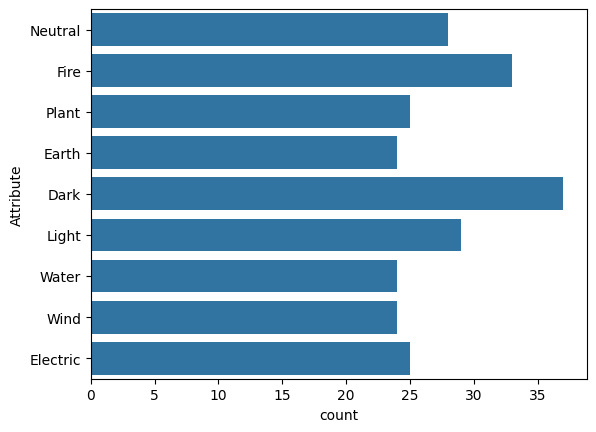

In [112]:
# This makes a countplot to display the counts of the attributes because I'm trying a new categorical plot and library.
sns.countplot(digimon["Attribute"])

In [22]:
# This makes a correlation matrix that shows 
corr_matrix = digimon.corr(numeric_only = True)
corr_matrix

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Number,1.000000,0.923339,0.571901,0.626166,0.608113,0.552471,0.620177,0.560146,0.762861
Memory,0.923339,1.000000,0.355176,0.639569,0.623400,0.608372,0.611728,0.583956,0.797777
Equip Slots,0.571901,0.355176,1.000000,0.392137,0.278687,0.211450,0.466534,0.237616,0.286558
Lv 50 HP,0.626166,0.639569,0.392137,1.000000,0.070957,0.605708,0.561376,0.055314,0.317051
Lv50 SP,0.608113,0.623400,0.278687,0.070957,1.000000,-0.148365,0.169960,0.895652,0.603240
Lv50 Atk,0.552471,0.608372,0.211450,0.605708,-0.148365,1.000000,0.426901,-0.186125,0.522005
Lv50 Def,0.620177,0.611728,0.466534,0.561376,0.169960,0.426901,1.000000,0.182606,0.225921
Lv50 Int,0.560146,0.583956,0.237616,0.055314,0.895652,-0.186125,0.182606,1.000000,0.442214
Lv50 Spd,0.762861,0.797777,0.286558,0.317051,0.603240,0.522005,0.225921,0.442214,1.000000


([<matplotlib.axis.YTick at 0x162dd452420>,
 [Text(0, 0, 'Number'),
  Text(0, 1, 'Memory'),
  Text(0, 2, 'Equip Slots'),
  Text(0, 3, 'Lv 50 HP'),
  Text(0, 4, 'Lv50 SP'),
  Text(0, 5, 'Lv50 Atk'),
  Text(0, 6, 'Lv50 Def'),
  Text(0, 7, 'Lv50 Int'),
  Text(0, 8, 'Lv50 Spd')])

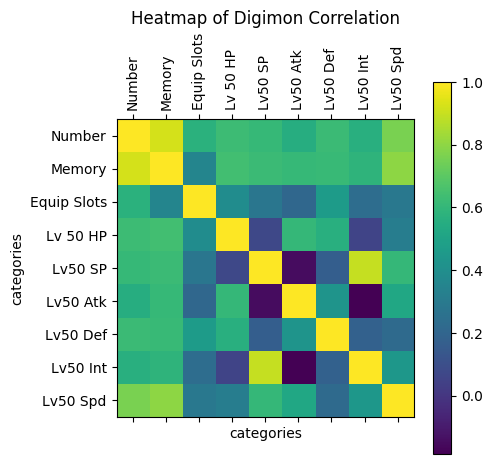

In [23]:
# This prints a heatmap over the correlation matrix.
plt.matshow(corr_matrix)
plt.ylabel("categories")
plt.xlabel("categories")
plt.title("Heatmap of Digimon Correlation")
# This creates a colorbar so that you can tell the strength of the correlation.
plt.colorbar()
# This adds the labels to the x and y axis so that you can read what each category is.
num_labels = len(corr_matrix.index)
plt.xticks(ticks=range(num_labels), labels = corr_matrix.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels = corr_matrix.index)

In [24]:
# Interesting things about the heatmap: only SP and attack ended up having a negative correlation at all, and it's weak,
# despite just being a number that counts each digimon, number correlates fairly well with everything, SP and intelligence
# are actually related fairly strongly, and have the best relationship unrelated to number, though speed and memory are fairly
# related as well.

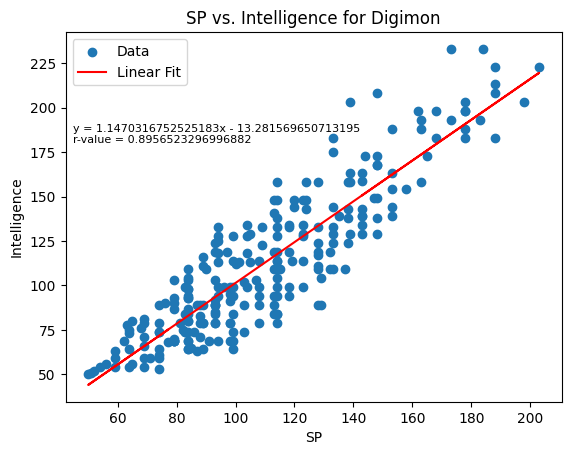

In [126]:
# Creates variables for SP and Intelligence
sp = digimon["Lv50 SP"]
int = digimon["Lv50 Int"]
# Creates a linear model and a linear fit from it.
linear_model = scipy.stats.linregress(sp, int)
slope = linear_model.slope
# print(slope)
intercept = linear_model.intercept
# print(intercept)
r_value = linear_model.rvalue
# print(r_value)
linear_fit = slope*sp+intercept
# Creates the actual scatter plot.
plt.scatter(sp, int, label = "Data")
plt.plot(sp, linear_fit, c="red", label = "Linear Fit")
plt.xlabel("SP")
plt.ylabel("Intelligence")
plt.title("SP vs. Intelligence for Digimon")
plt.legend()
plt.text(45, 180, "y = 1.1470316752525183x - 13.281569650713195 \nr-value = 0.8956523296996882", fontsize = 8)
plt.savefig("scatter.png")
# As you can clearly observe, the data follows the linear model fairly well, as the data fits it closely.

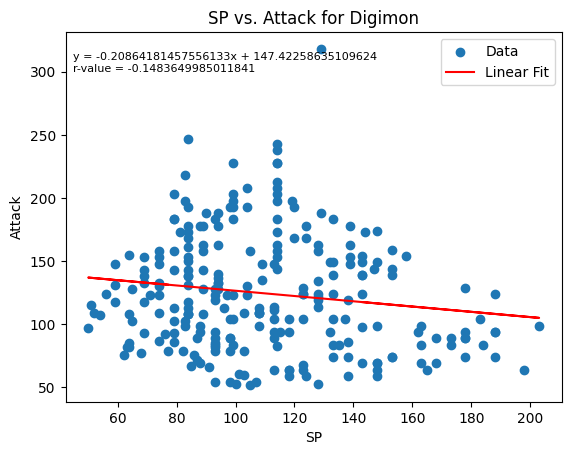

In [127]:
# Creates a variable for Attack
attack = digimon["Lv50 Atk"]
# Creates a linear model and a linear fit from it.
linear_model = scipy.stats.linregress(sp, attack)
slope = linear_model.slope
# print(slope)
intercept = linear_model.intercept
# print(intercept)
r_value = linear_model.rvalue
# print(r_value)
linear_fit = slope*sp+intercept
# Creates the actual scatter plot.
plt.scatter(sp, attack, label = "Data")
plt.plot(sp, linear_fit, c="red", label = "Linear Fit")
plt.xlabel("SP")
plt.ylabel("Attack")
plt.title("SP vs. Attack for Digimon")
plt.legend()
plt.text(45, 300, "y = -0.20864181457556133x + 147.42258635109624 \nr-value = -0.1483649985011841", fontsize = 8)
plt.savefig("scatter2.png")
# As you can clearly observe, the data follows the linear model less closely than the last one, as the r_value is lower, but it is a 
# negative correlation.

In [36]:
# New Thing: Trying a to figure out a 2-Sample KS test.
speed = digimon["Lv50 Spd"]
memory = digimon["Memory"]
scipy.stats.ks_2samp(speed, memory)
# This kstestresult being 1.0 implies that we definitely determine that they come from different distributions and the p-value 
# agrees, being much less than 0.05.

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(6.838876861876014e-149), statistic_location=np.int64(25), statistic_sign=np.int8(-1))

In [39]:
# This creates a contingency table and performs a chi-squared test on it.
attribute_by_type = pd.crosstab(digimon["Attribute"], digimon["Type"])
print(attribute_by_type)
c, p, dof, expected = scipy.stats.chi2_contingency(attribute_by_type)
print()
print("P-value:", p)
# Interesting results from the crosstab: dark attributes, which have the most amount of digimon, are almost always virus types, light has a 
# similar pattern for vaccine types, free types are fairly rare but it makes since that they would have the most neutral attributes.
# Chi-Squared Interpretation: The p-value is very far below 0.05 so the data is undoubtedly significant.

Type       Data  Free  Vaccine  Virus
Attribute                            
Dark          3     6        2     26
Earth         7     4        4      9
Electric      6     0        6     13
Fire          8     3       11     11
Light         5     2       20      2
Neutral       8    11        5      4
Plant        10     4        4      7
Water         6     2        8      8
Wind          7     5       10      2

P-value: 3.046235014769864e-09


In [40]:
# We're going to do the same thing again, but with stage and type, because I'm curious what patterns could be there.
stage_by_type = pd.crosstab(digimon["Stage"], digimon["Type"])
print(stage_by_type)
c, p, dof, expected = scipy.stats.chi2_contingency(stage_by_type)
print()
print("P-value:", p)
# Interesting results from the crosstab: it is interesting that there are no ultra data types, ultra is the highest level of
# evolution in digimon, so vaccine ultras would be powerful, because they are weak to data, and would have an advantage in the 
# absence of data-types, virus also tends to have a strong presence in most stages, which also implies that vaccine types are 
# powerful because virus is weak to vaccine.
# Chi-Squared Interpretation: Because it is so far below 0.05, the data is definitely significant.

Type         Data  Free  Vaccine  Virus
Stage                                  
Armor           0     2        1      0
Baby            0     5        0      0
Champion       12     5       15     22
In-Training     0    11        0      0
Mega           21     5       21     27
Rookie         11     5       11     11
Ultimate       16     4       18     20
Ultra           0     0        4      2

P-value: 7.819838360509357e-15


In [151]:
# Performing the train-test split on the digimon data, I chose the inputs that correlated most with number to determine stage,
# since generally stage increased with number, reducing test size increased accuracy.
X = digimon[["Memory", "Lv50 Spd"]]
y = digimon["Stage"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [152]:
# Defines the classifier and trains the model, increasing the number of neighbors increased accuracy.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [153]:
# This tests the data and prints the accuracy.
prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy Score:", accuracy*100)

Accuracy Score: 84.61538461538461


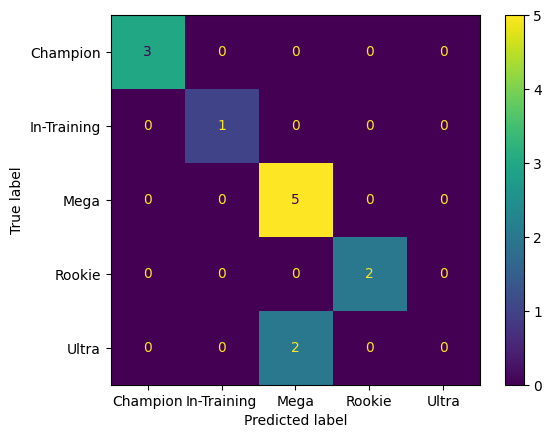

In [154]:
# This makes a confusion matrix to determine where the model is predicting incorrectly.
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

In [117]:
# Creates a mask for each type.
virus = digimon[digimon["Type"] == "Virus"]
vaccine = digimon[digimon["Type"] == "Vaccine"]
data = digimon[digimon["Type"] == "Data"]
free = digimon[digimon["Type"] == "Free"]

In [119]:
# Creates a statistical summary of virus types.
virus.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,134.695122,12.597561,1.695122,1271.951220,110.378049,130.439024,121.573171,114.963415,117.390244
std,68.059467,6.559998,0.796428,316.190437,33.451878,47.477635,30.761540,46.104670,28.990316
min,18.000000,4.000000,0.000000,530.000000,51.000000,52.000000,64.000000,51.000000,71.000000
25%,78.250000,6.000000,1.000000,1050.000000,84.000000,89.000000,100.000000,75.250000,92.000000
50%,135.500000,12.000000,2.000000,1240.000000,103.500000,129.500000,116.000000,106.500000,118.500000
75%,197.750000,18.000000,2.000000,1487.500000,128.000000,163.000000,139.000000,141.750000,139.000000
max,243.000000,25.000000,3.000000,1980.000000,203.000000,247.000000,188.000000,233.000000,193.000000


In [120]:
# Creates a statistical summary of vaccine types.
vaccine.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,136.114286,13.371429,1.571429,1231.571429,115.071429,128.371429,120.014286,117.942857,128.285714
std,66.704745,6.402381,0.713664,334.324479,30.784111,47.063685,32.772157,40.109230,31.942041
min,17.000000,4.000000,1.000000,540.000000,59.000000,53.000000,69.000000,54.000000,71.000000
25%,85.000000,8.000000,1.000000,1030.000000,90.000000,94.000000,98.250000,84.250000,102.500000
50%,135.000000,12.000000,1.000000,1190.000000,113.500000,124.000000,109.500000,113.500000,127.000000
75%,189.750000,18.000000,2.000000,1487.500000,132.750000,153.750000,142.000000,142.000000,147.000000
max,248.000000,25.000000,3.000000,1980.000000,198.000000,318.000000,208.000000,208.000000,213.000000


In [121]:
# Creates a statistical summary of data types.
data.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,132.550000,12.166667,1.850000,1198.833333,113.600000,120.366667,117.150000,118.966667,124.716667
std,66.383944,6.131792,0.798834,292.691147,33.442691,41.295121,29.744576,39.210413,34.948918
min,21.000000,4.000000,1.000000,690.000000,59.000000,59.000000,68.000000,56.000000,72.000000
25%,80.500000,6.000000,1.000000,990.000000,87.000000,88.500000,94.000000,87.750000,92.750000
50%,135.500000,12.000000,2.000000,1140.000000,113.000000,115.500000,113.500000,112.500000,119.000000
75%,186.250000,18.000000,2.250000,1450.000000,139.250000,145.000000,135.250000,141.500000,153.000000
max,249.000000,25.000000,3.000000,2080.000000,188.000000,228.000000,213.000000,213.000000,218.000000


In [122]:
# Creates a statistical summary of free types.
free.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,70.243243,7.729730,0.864865,1055.945946,92.243243,110.837838,96.729730,87.189189,105.162162
std,77.022509,6.427582,0.947575,344.621044,26.326376,43.674626,31.468369,26.741393,32.812187
min,1.000000,2.000000,0.000000,540.000000,50.000000,54.000000,59.000000,50.000000,61.000000
25%,10.000000,3.000000,0.000000,830.000000,74.000000,79.000000,74.000000,69.000000,76.000000
50%,46.000000,5.000000,1.000000,1030.000000,88.000000,104.000000,89.000000,79.000000,95.000000
75%,124.000000,14.000000,1.000000,1280.000000,108.000000,139.000000,111.000000,103.000000,133.000000
max,245.000000,22.000000,3.000000,1780.000000,143.000000,243.000000,208.000000,148.000000,173.000000


In [123]:
# Looking at mean values in each table, generally virus and vaccine types have higher values that the other two, and they tend to 
# trade off, though vaccine does have a higher memory, implying that perhaps virus types are slightly less costly to use.